In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
spotify=pd.read_csv('dataset.csv')
spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
# Remove rows with null values

In [90]:
spotify.dropna(inplace=True)

In [ ]:
# Remove any duplicate data

In [91]:
spotify.drop_duplicates(inplace=True)

In [ ]:
# Data overview

In [18]:
spotify.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [12]:
spotify.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [9]:
# Genre Analysis

In [61]:
gen=spotify['track_genre'].value_counts()
gen.head(10)


track_genre
acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
Name: count, dtype: int64

Text(29.222222222222214, 0.5, 'Count')

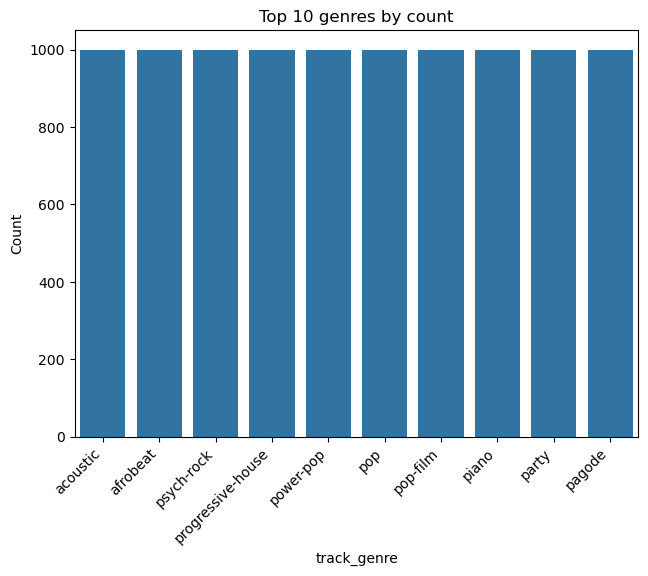

In [88]:
genre=spotify['track_genre'].value_counts()
sns.barplot(x=genre[:10].index,y=genre[:10].values)
plt.tight_layout()
plt.title('Top 10 genres by count')
tik=plt.xticks(rotation=45,ha='right')
plt.ylabel('Count')

Text(0, 0.5, 'Popularity')

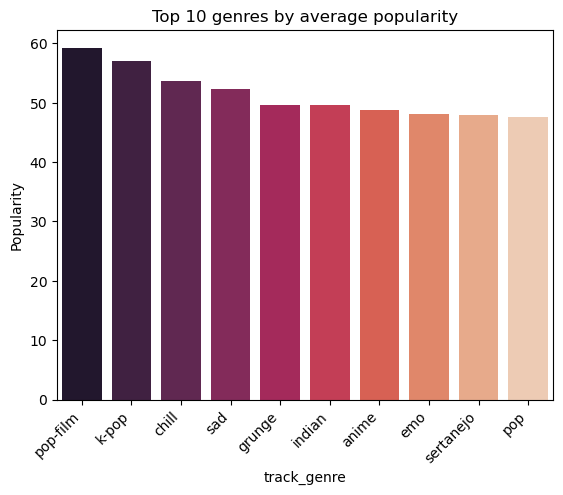

In [105]:
gen_pop=spotify.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=gen_pop.index,y=gen_pop.values,palette='rocket')
plt.title('Top 10 genres by average popularity')
tik=plt.xticks(rotation=45,ha='right')
plt.ylabel('Popularity')

In [12]:
# Explicit Tracks

Text(0.5, 1.0, 'Explicit vs Non Explicit Tracks')

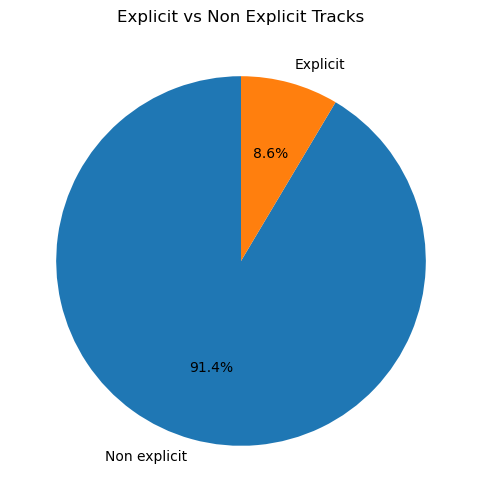

In [103]:
exp=spotify['explicit'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(exp,labels=['Non explicit','Explicit'],  autopct='%1.1f%%',startangle=90)
plt.title('Explicit vs Non Explicit Tracks')

Text(0.5, 1.0, 'Popularity of explicit and non-explicit tracks')

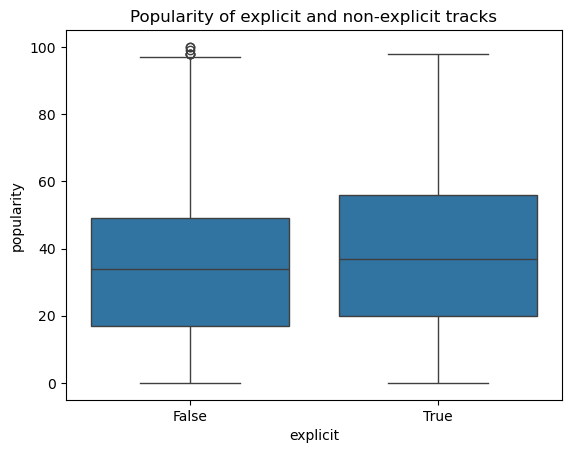

In [14]:
sns.boxplot(data=spotify,x='explicit',y='popularity')
plt.title('Popularity of explicit and non-explicit tracks')

In [15]:
# Audio Features

Text(0.5, 1.0, 'Correlations between danceability, energy, loudness, tempo, and valence')

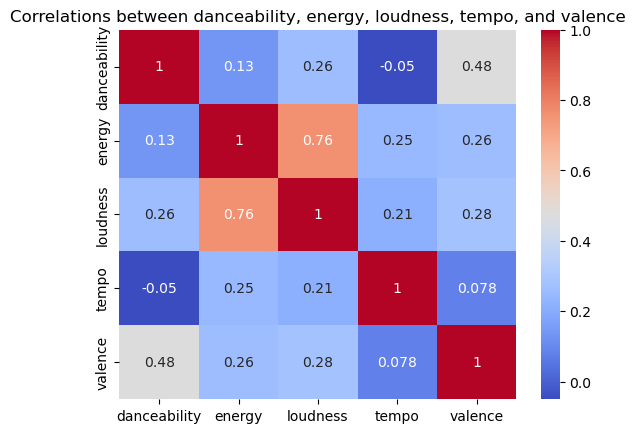

In [16]:
cor=spotify[['danceability', 'energy', 'loudness', 'tempo','valence']].corr()
sns.heatmap(cor,cmap='coolwarm',annot=True)
plt.title('Correlations between danceability, energy, loudness, tempo, and valence')


Text(0.5, 1.0, 'Danceability Vs Energy')

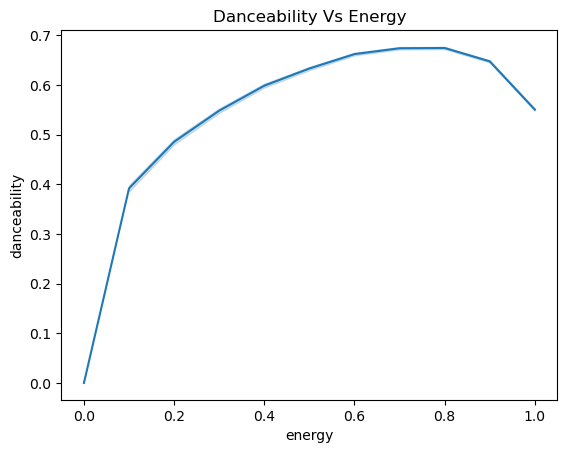

In [17]:
rounded_en=np.ceil(spotify['energy']*10)/10
rounded_da=np.ceil(spotify['danceability']*10)/10
sns.lineplot(data=spotify,x=rounded_en,y=rounded_da)
plt.title('Danceability Vs Energy')

In [18]:
# Popularity Trends

Text(0.5, 1.0, 'Popularity Distribution')

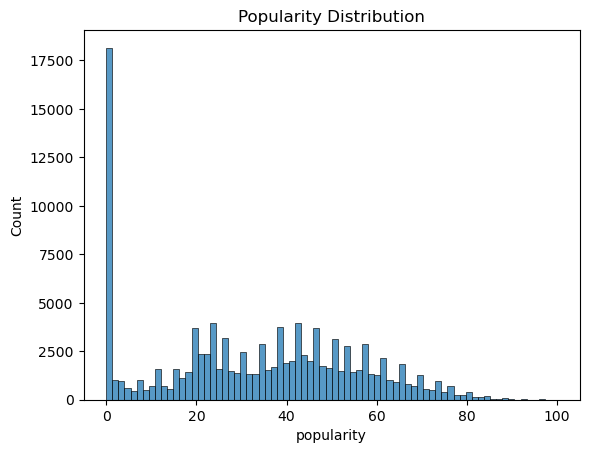

In [95]:
sns.histplot(spotify['popularity'])
plt.title('Popularity Distribution')

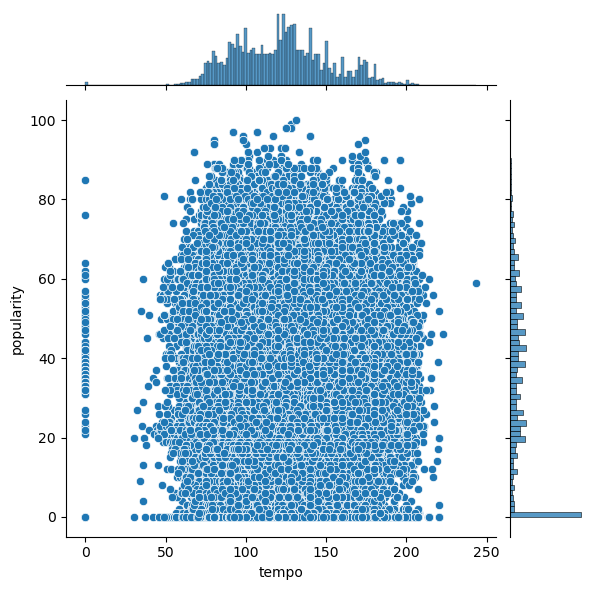

In [66]:
sns.jointplot(x='tempo', y='popularity',data=spotify)


In [21]:
# Key and Mode

<Axes: xlabel='key', ylabel='Count'>

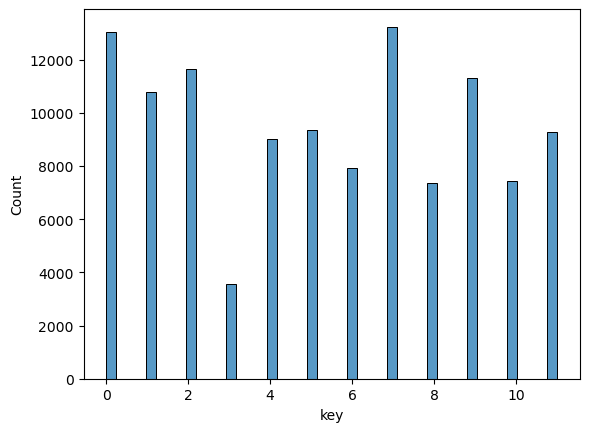

In [22]:
sns.histplot(data=spotify,x='key')


Text(0.5, 1.0, 'Major mode(1) vs Minor mode(0)')

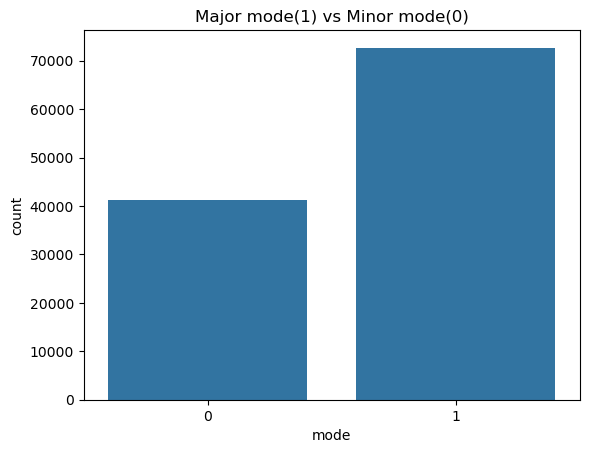

In [8]:
sns.countplot(x='mode',data=spotify)
plt.title('Major mode(1) vs Minor mode(0)')

In [ ]:
# Valence and Positivity

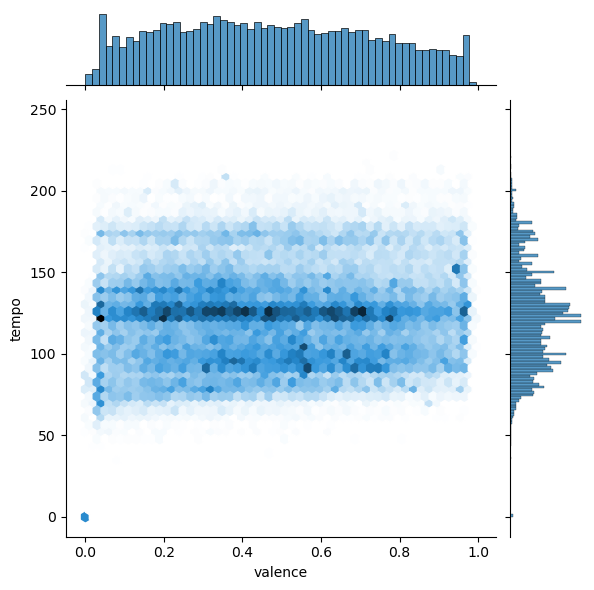

In [64]:
sns.jointplot(x='valence',y='tempo',data=spotify,kind='hex')

Text(0, 0.5, 'Valence')

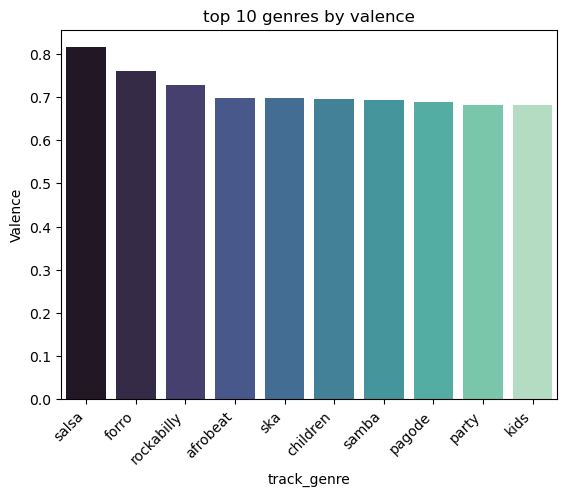

In [106]:
t_v=spotify.groupby('track_genre')['valence'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=t_v.index,y=t_v.values,palette='mako')
tik=plt.xticks(rotation=45,ha='right')
plt.title('top 10 genres by valence')
plt.ylabel('Valence')

In [ ]:
# Live and Instrumental Tracks

Text(0, 0.5, 'Instrumentalness')

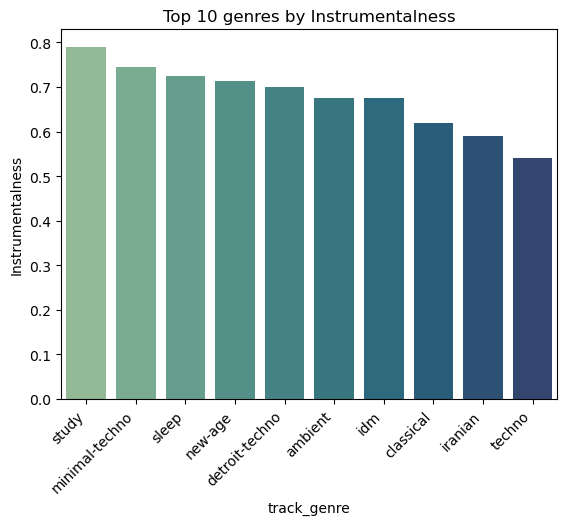

In [107]:
t_i=spotify.groupby('track_genre')['instrumentalness'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=t_i.index,y=t_i.values,palette='crest')
plt.title('Top 10 genres by Instrumentalness')
tik=plt.xticks(rotation=45,ha='right')
plt.ylabel('Instrumentalness')

Text(0, 0.5, 'Liveness')

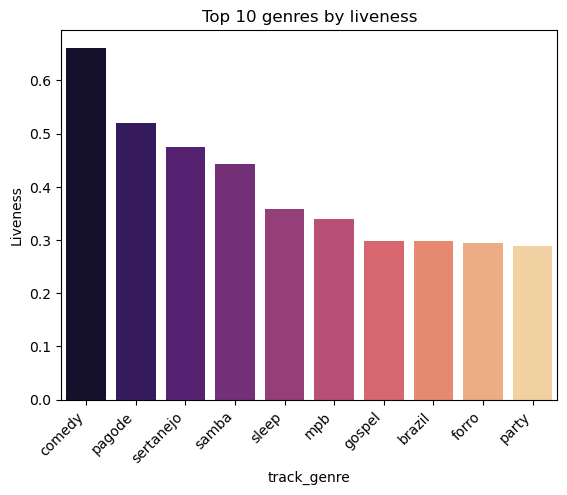

In [108]:
t_l=spotify.groupby('track_genre')['liveness'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=t_l.index,y=t_l.values,palette='magma')
plt.title('Top 10 genres by liveness')
tik=plt.xticks(rotation=45,ha='right')
plt.ylabel('Liveness')

In [ ]:
# Most Popular Artists

Text(0.5, 0, 'popularity')

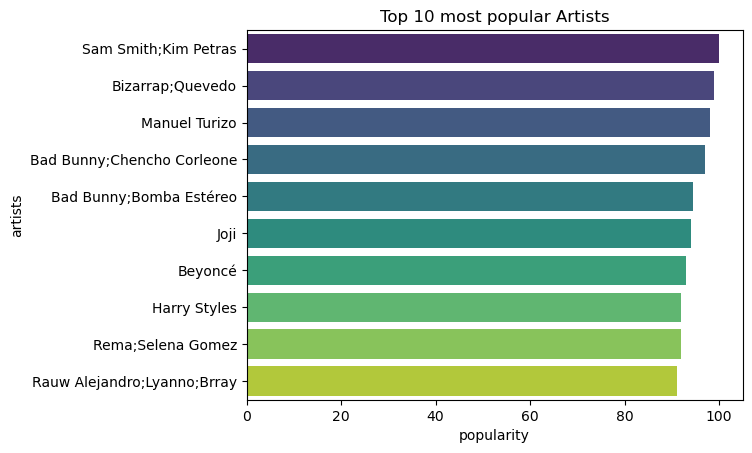

In [109]:
spAr=spotify.groupby('artists')['popularity'].mean().sort_values(ascending=False)[:10]
sns.barplot(y=spAr.index,x=spAr.values,orient='h',palette='viridis')
plt.title('Top 10 most popular Artists')
plt.xlabel('popularity')

In [ ]:
# Most popular songs

Text(0, 0.5, 'Popularity')

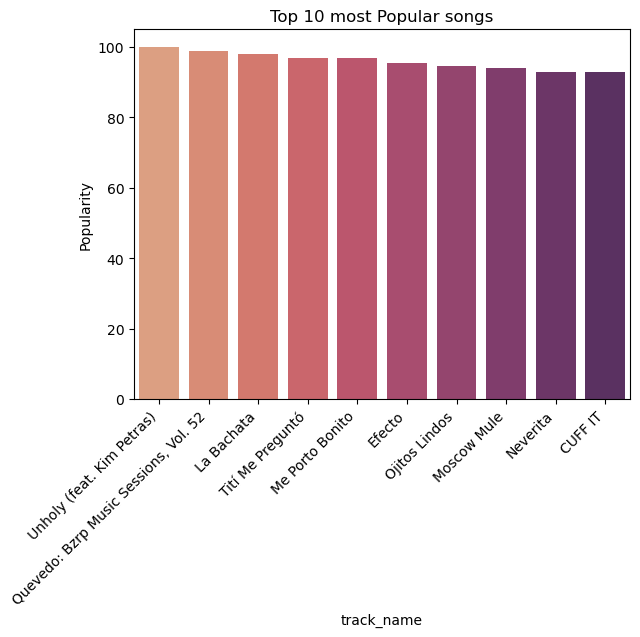

In [110]:
nPm=spotify.groupby('track_name')['popularity'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=nPm.index,y=nPm.values,palette='flare')
plt.title('Top 10 most Popular songs')
tik=plt.xticks(rotation=45,ha='right')
plt.ylabel('Popularity')

In [ ]:
# Additional 

In [ ]:
# The song with the Highest Valence(Positivity)

In [14]:
spotify.groupby('track_name')['valence'].mean().sort_values(ascending=False)[:1]

track_name
The Demander    0.995
Name: valence, dtype: float64

In [ ]:
# Most danceable song

In [15]:
spotify.groupby('track_name')['danceability'].mean().sort_values(ascending=False)[:1]

track_name
Sol Clap    0.985
Name: danceability, dtype: float64

In [ ]:
# Song with the highest energy

In [16]:
spotify.groupby('track_name')['energy'].mean().sort_values(ascending=False)[:1]

track_name
Amigo Charly Brown    1.0
Name: energy, dtype: float64